# Real Estate Valuation

# 1. Import Dataset



In [1]:
#import package
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Acep234/Acep/main/real_estate.csv')
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [3]:
# Cek Data
print('Dataset Demensions :',df.shape)
print('Rows Duplicated    :',df.duplicated().sum())
df.info()

Dataset Demensions : (414, 8)
Rows Duplicated    : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# 2. Data Preprocessing

Mengambil tahun transaksi pada X1 transaction date

In [4]:
df["X1 transaction date"] = df["X1 transaction date"].astype(str).str[:4].astype(float)

In [5]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [6]:
#drop column no
df=df.drop(df.columns[[0]],axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.0,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.0,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.0,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.0,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.0,5.0,390.56840,5,24.97937,121.54245,43.1


#### Simplify the colums label for a better processing

In [7]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
#Hapus comment pada label column supaya lebih simple
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 
                   'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [9]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.0,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.0,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.0,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.0,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.0,5.0,390.56840,5,24.97937,121.54245,43.1


# 3. Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Profiling Descriptive Stats

In [11]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Key takeaway:
Harga rumah ini menyebar dari range 7,6 - 117,5 dengan harga rata-ratanya 37,98. Karena nilai Mediannya yaitu 38,45 hampir mendekati dengan nilai rata-ratanya, maka data ini bisa diasumsikan berdistribusi normal.

In [12]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

**Cek Sebaran Data**

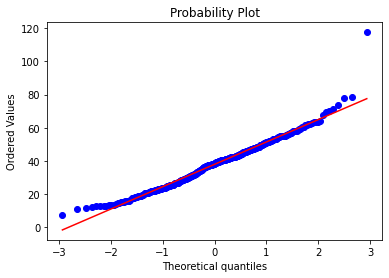

In [13]:
#QQ-Plot
stats.probplot(df['Y'],dist='norm',plot=py)
py.show()

Key takeaway:
Berdasarkan QQ Plot dapat diketahui bahwa data pointnya mendekati garis diagonalnya, hal ini menandakan harga sebaran data rumah ini berdistribusi normal. Sehingga harga rumah ini bisa diprediksi dengan model regresi, karena memenuhi salah satu asumsi model regresi.

**Cek Outlier**


C:\Users\Acep.Hidayat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


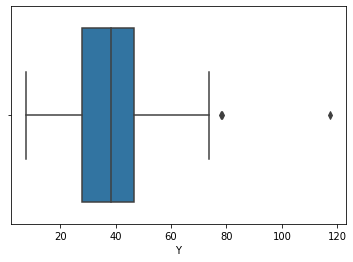

In [14]:
sns.boxplot(df['Y'])
py.show()

Key takeaway:Dari gambar di atas, dapat diketahui bahwa ada 2 titik yang di atas garis max-nya. Sehingga bisa dikatakan data set tersebut mengandung data yang outliers.

In [15]:
#Find Q1 & Q3
q1=np.percentile(df['Y'],25)
q3=np.percentile(df['Y'],75)
# Find the IQR which is the difference between third and first quartile
iqr=q3-q1
# Find lower and upper bound (Batas Bawah & Batas Atas)
lower_bond=q1-(1.5*iqr)
upper_bond=q3+(1.5*iqr)
# Find outliers (outliers>upper_bond atau outliers<lower_bond)
outliers=df[(df['Y']<lower_bond) | (df['Y']>upper_bond)]
outliers

,X1,X2,X3,X4,X5,X6,Y
220,2013.0,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.0,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.0,35.4,318.5292,9,24.97071,121.54069,78.0


Ada tiga data yang termasuk outliers.

In [16]:
# Data Tanpa OutLier
df_new=outliers=df[(df['Y']>=lower_bond) & (df['Y']<=upper_bond)]
df_new.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.0,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.0,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.0,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.0,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.0,5.0,390.56840,5,24.97937,121.54245,43.1


C:\Users\Acep.Hidayat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


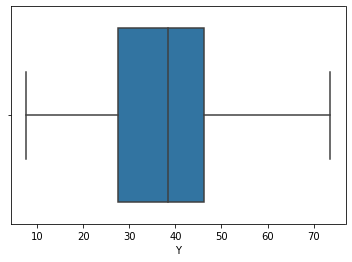

In [17]:
sns.boxplot(df_new['Y'])
plt.show()

**Cek Korelasi Data**

Note : Jika koef korelasi >= 0.5, ada hubungan antar variabel

Jika koef korelasi < 0.5, tidak ada hubungan antar variabel

C:\Users\Acep.Hidayat\AppData\Local\Temp\ipykernel_17568\2148112402.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


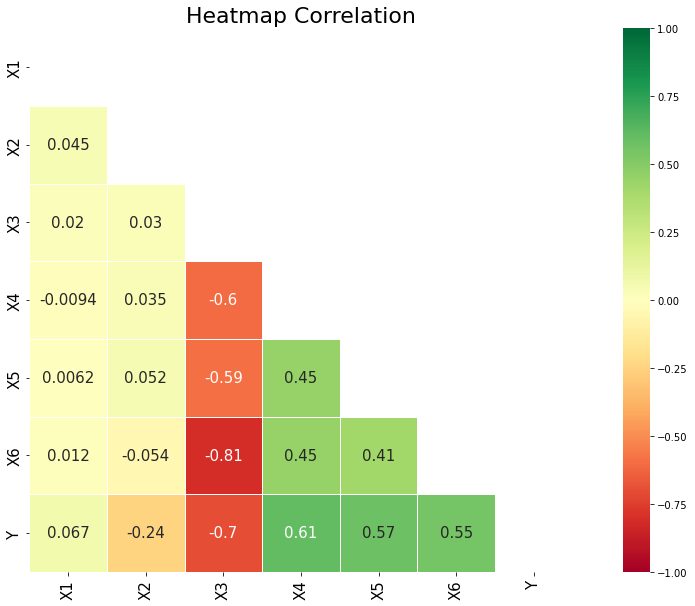

In [18]:
#Heatmap Correlation
import seaborn as sns
corr = df_new.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1,
            center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)
plt.show()

Key takeaway: Dari gambar di atas dapat disimpulkan bahwa, variabel yang memiliki korelasi dengan Y adalah X3,X4,X5 dan X6. Untuk X4-X6 termasuk positif correlation, sedangkan untuk X3 termasuk negatif correlation.
Berikut hubungan antara variabel dependen dan variabel independen nya:
- Hubungan X3 dengan Y: 
Artinya Semakin jauh dengan stasiun MRT, maka harga rumah semakin kecil.
- Hubungan X4 dengan Y:
Artinya Semakin banyak toko serba ada, maka harga rumah semakin besar.
- Hubungan X5 dengan Y:
Artinya Semakin besar latitude, maka harga rumah semakin besar.
- Hubungan X6 dengan Y: 
Artinya Semakin besar longitude, maka harga rumah semakin besar.

### X1 vs Y

In [19]:
import matplotlib.pyplot as plt

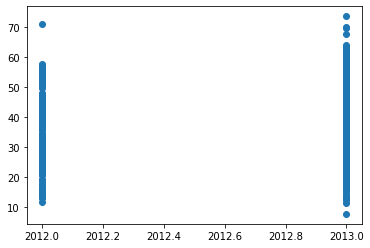

In [20]:
#House Date Year vs House Price Plot
plt.scatter(df_new['X1'],df_new['Y'])
plt.show()

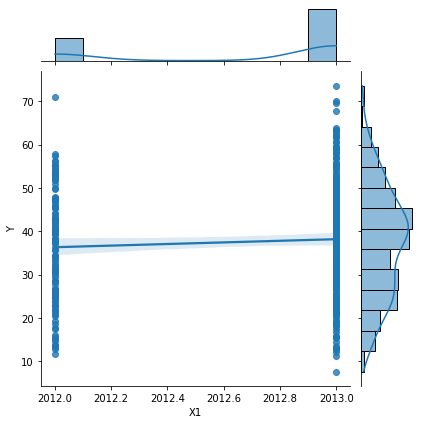

In [21]:
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X1', y='Y', data=df_new, kind="reg")
py.show()

### X2 vs Y

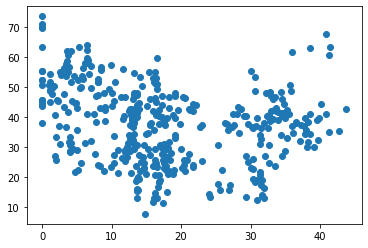

In [22]:
#House Age vs House Price Plot
plt.scatter(df_new['X2'],df_new['Y'])
plt.show()

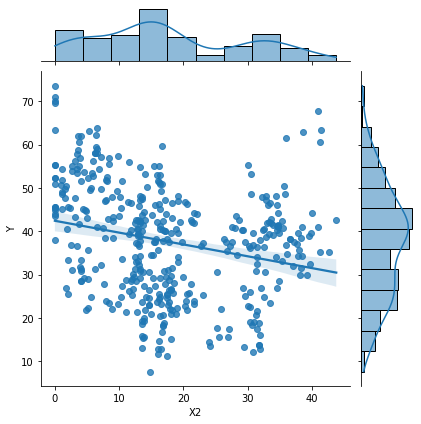

In [23]:
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X2', y='Y', data=df_new, kind="reg")
py.show()

Key takeaway:Karena mayoritas data pointnya menyebar tidak mendekati garis diagonalnya, maka data tersebut tidak memiliki korelasi. Karena galat of errornya yang cukup besar yang bisa dilihat dari jarak antara data point ke garis diagonalnya.
- Hubungan X2 dengan Y: Artiya tidak ada hubungan antara usia rumah dengan harga rumahnya. 

### X3 vs Y

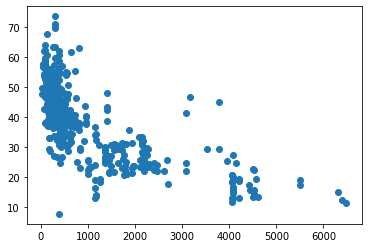

In [24]:
#distance to the nearest MRT station vs House Price Plot
plt.scatter(df_new['X3'],df_new['Y'])
plt.show()

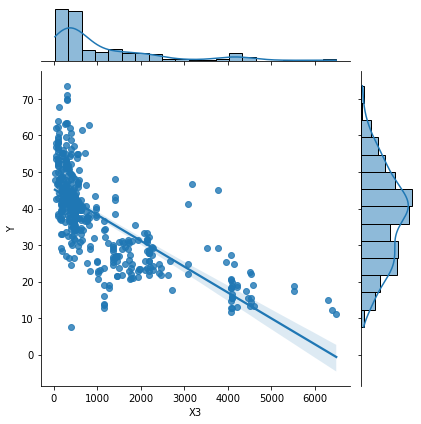

In [25]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X3', y='Y', data=df_new, kind="reg")
py.show()

Key takeaway:Ada hubungan Negatif karena garis diagonalnya bergerak dari kiri atas ke kanan bawah.
- Hubungan X3 dengan Y: 
Artinya Semakin jauh dengan stasiun MRT, maka harga rumah semakin kecil dan sebaliknya.

### X4 vs Y

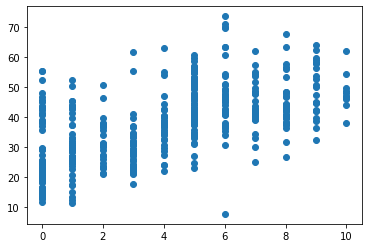

In [26]:
#number of convenience stores vs House Price
plt.scatter(df_new['X4'],df_new['Y'])
plt.show()

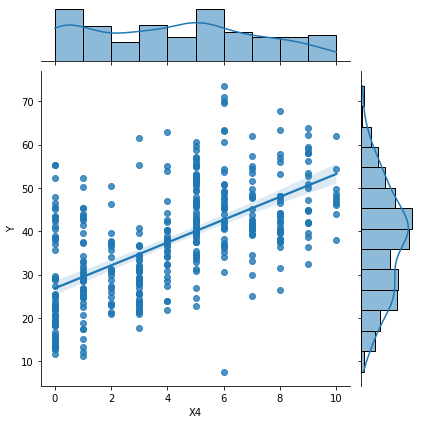

In [27]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X4', y='Y', data=df_new, kind="reg")
py.show()

Key takeaway:Ada hubungan Positif karena garis diagonalnya bergerak dari kiri bawah ke kanan atas.
- Hubungan X4 dengan Y:
Artinya Semakin banyak toko serba ada, maka harga rumah semakin besar.

### X5 vs Y

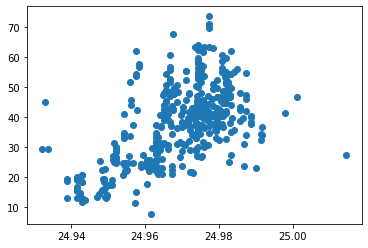

In [28]:
#Latitude vs House Price
plt.scatter(df_new['X5'],df_new['Y'])
plt.show()

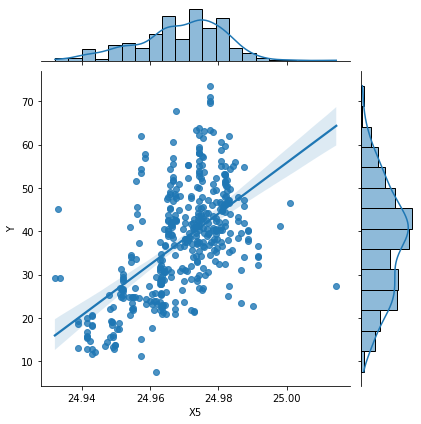

In [29]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X5', y='Y', data=df_new, kind="reg")
py.show()

Key takeaway:Key takeaway:Ada hubungan Positif karena dari garis diagonalnya bergerak dari kiri bawah ke kanan atas.
- Hubungan X5 dengan Y:
Artinya Semakin besar latitude, maka harga rumah semakin besar.

### X6 vs Y

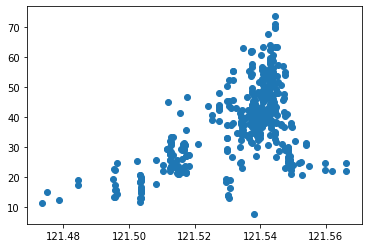

In [30]:
#Longitude vs House Price
plt.scatter(df_new['X6'], df_new['Y'])
plt.show()

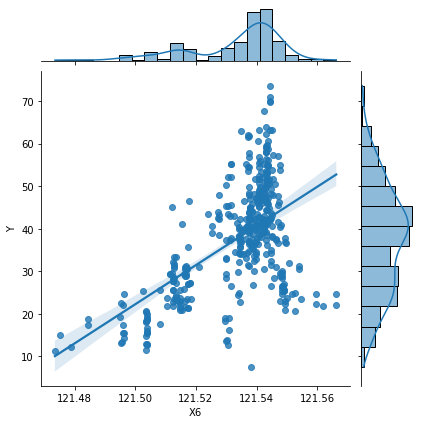

In [31]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X6', y='Y', data=df_new, kind="reg")
py.show()

Key takeaway:Key takeaway:Key takeaway:Ada hubungan Positif karena dari garis diagonalnya bergerak dari kiri bawah ke kanan atas.
- Hubungan X6 dengan Y: 
Artinya Semakin besar longitude, maka harga rumah semakin besar.

## Feature Engineering:

###  Checking Multicolinearity

In [32]:
import seaborn as sns

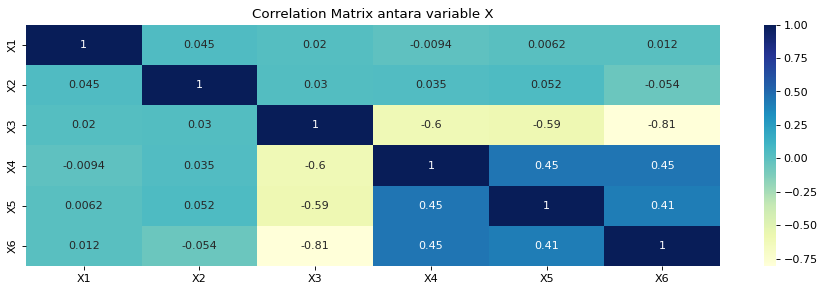

In [33]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df_new.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')
plt.show()

Key takeaway:Adanya Multikolinearitas (Hubungan antar Variabel X)
- X3 & X4 : -0,6
- X3 & X5 : -0,59
- X3 & X6 : -0,81
karena X6 memiliki nilai multikolonearitas paling tinggi (|-0,81|) sedangkan nilai korelasinya paling rendah (|0,52|), maka X6 ini tidak akan dimasukan pada model.

# 4. Model Prediction

In [102]:
X = df_new.loc[:, 'X3':'X5']
y = pd.DataFrame(df_new['Y'])
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [103]:
X.head()

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937


In [104]:
y.head()

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


### Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [106]:
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[ 0.02626102 -0.02282438  1.81468406]
 [ 1.54898949 -1.38398722 -1.17834838]
 [ 2.32527848 -1.38398722 -2.11508055]
 [-0.74039706 -1.04369651  0.35924552]
 [-0.48686441  0.31746633 -0.32860424]
 [-0.21504679 -1.38398722 -0.47438973]
 [-0.23219168 -0.02282438  0.77566042]
 [-0.65448945  0.99804775  0.48731122]
 [-0.78762975  2.01891988  1.01407205]
 [ 1.06887607 -0.02282438 -0.65642023]]


In [107]:
print(y_train[:10])

        Y
296  34.1
307  24.7
41   18.2
306  50.2
139  42.5
239  29.7
159  37.4
23   47.9
363  48.0
13   23.8


## Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
ypred=model.predict(X_test)

In [110]:
ypred = ypred.reshape(-1,1)

In [111]:
# evaluate model
display(model.score(X_test, y_test))

0.6191822804548149

In [112]:
from sklearn.metrics import r2_score #Koefisien Determinasi: Menunjukan seberapa besar model mampu menggambarkan keragaman datanya
from sklearn.metrics import mean_squared_error # Nilai aktual-nilai prediksi
from sklearn.metrics import mean_absolute_error # abs(aktual-nilai prediksi)

#### MSE

In [113]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2)) # Akar MAE

MSE :  65.88
MAE :  6.3
RMSE :  8.12


#### R-Square

In [114]:
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr

0.62

Model Regresi linear ini memiliki nilai akurasi sebesar 62%, artinya model ini mampu menjelaskan keragaman data sebesar 62% dan sisanya 38% dapat dijelaskan oleh variabel lain.

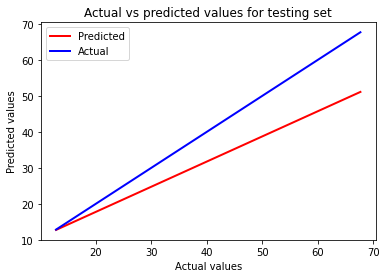

In [115]:
# Plot actual vs predicted values for testing set
plt.plot([y_test.min(), y_test.max()], [ypred.min(), ypred.max()], linewidth=2,color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2,color='blue', label='Actual')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.legend()
plt.show()

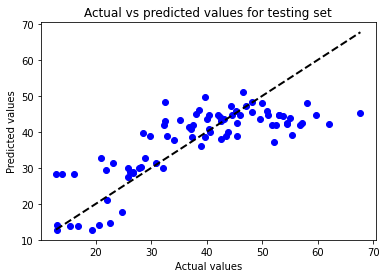

In [116]:
# Plot actual vs predicted values for testing set
plt.scatter(y_test, ypred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.show()

## Random Forest Regression

In [117]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict_Test
ypred2 = model2.predict(X_test)
ypred2 = ypred2.reshape(-1,1)


r2_rf=r2_score(y_test,ypred2).round(2)

print('MSE : ', mean_squared_error(y_test,ypred2))
print('MAE : ', mean_absolute_error(y_test,ypred2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred2)))

C:\Users\Acep.Hidayat\AppData\Local\Temp\ipykernel_17568\3817388279.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


0.7156824813272102

MSE :  49.183941042331575
MAE :  5.309229580582352
RMSE :  7.0131263386831675


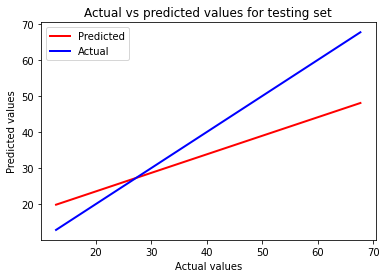

In [118]:
# Plot actual vs predicted values for testing set
plt.plot([y_test.min(), y_test.max()], [ypred2.min(), ypred2.max()], linewidth=2,color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2,color='blue', label='Actual')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.legend()
plt.show()

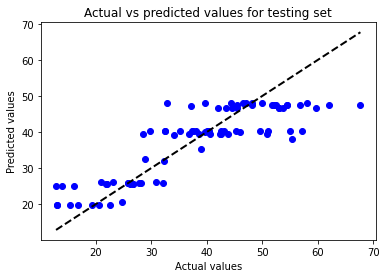

In [119]:
# Plot actual vs predicted values for testing set
plt.scatter(y_test, ypred2, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.show()

## Support Vector Regression (SVR)

In [120]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

C:\Users\Acep.Hidayat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [121]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred3 = model3.predict(X_test)
ypred3 = ypred3.reshape(-1,1)

r2_sv=r2_score(y_test,ypred3).round(2)

print('MSE : ', mean_squared_error(y_test,ypred3))
print('MAE : ', mean_absolute_error(y_test,ypred3))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred3)))

0.6339392861178776

MSE :  63.32465425815911
MAE :  5.9900984794024295
RMSE :  7.9576789491760165


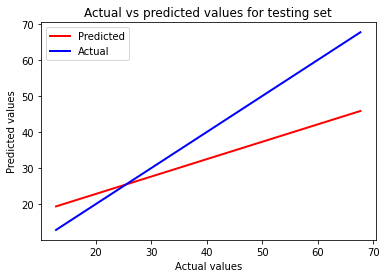

In [122]:
# Plot actual vs predicted values for testing set
plt.plot([y_test.min(), y_test.max()], [ypred3.min(), ypred3.max()], linewidth=2,color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2,color='blue', label='Actual')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.legend()
plt.show()

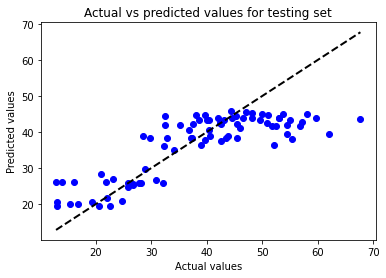

In [123]:
# Plot actual vs predicted values for testing set
plt.scatter(y_test, ypred3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.show()

## Polynomial Regression

In [124]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [125]:
# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [126]:
# Train a linear regression model with polynomial features
model4 = LinearRegression()
model4.fit(X_train_poly, y_train)

LinearRegression()

In [127]:
# Make predictions on the testing set
ypred4 = model4.predict(X_test_poly)

# Valuasi Model
r2_pr = r2_score(y_test, ypred4)
print("R-squared:", r2_pr)
print('MSE : ', mean_squared_error(y_test,ypred4))
print('MAE : ', mean_absolute_error(y_test,ypred4))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred4)))

R-squared: 0.718842222613689
MSE :  48.63733902544338
MAE :  5.366481362257052
RMSE :  6.9740475353587446


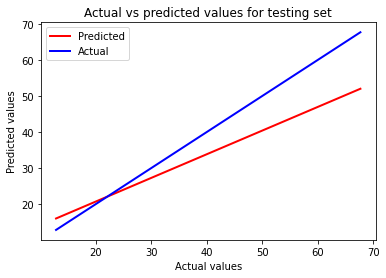

In [128]:
# Plot actual vs predicted values for testing set
plt.plot([y_test.min(), y_test.max()], [ypred4.min(), ypred4.max()], linewidth=2,color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2,color='blue', label='Actual')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.legend()
plt.show()

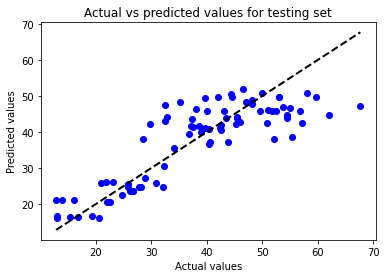

In [129]:
# Plot actual vs predicted values for testing set
plt.scatter(y_test, ypred4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.show()

## Decision Tree Regression

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
# Train a decision tree model
model5 = DecisionTreeRegressor()
model5.fit(X_train, y_train)

DecisionTreeRegressor()

In [132]:
# Make predictions on the testing set
ypred5 = model.predict(X_test)

# Calculate the R-squared score of the model
r2_dt = r2_score(y_test, ypred5)
print("R-squared:", r2_dt)
print('MSE : ', mean_squared_error(y_test,ypred5))
print('MAE : ', mean_absolute_error(y_test,ypred5))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred5)))

R-squared: 0.6191822804548149
MSE :  65.87746106331674
MAE :  6.297259677144196
RMSE :  8.11649315057413


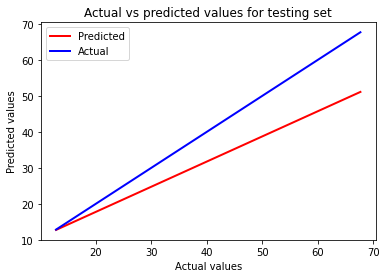

In [133]:
# Plot actual vs predicted values for testing set

plt.plot([y_test.min(), y_test.max()], [ypred5.min(), ypred5.max()], linewidth=2,color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2,color='blue', label='Actual')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.legend()
plt.show()

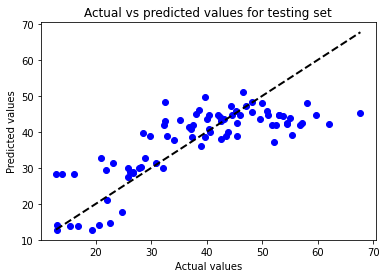

In [134]:
# Plot actual vs predicted values for testing set
plt.scatter(y_test, ypred5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values for testing set")
plt.show()

# 5. Model Comparison

In [135]:
data={'Model':['Linear Regression','Random Forest Regression','Support Vector Regression (SVR)','Polynomial Regression','Decision Tree Regression'],
     'R-Square':[r2_lr,r2_rf,r2_sv,r2_pr,r2_dt],
      'MSE':[(mean_squared_error(y_test,ypred).round(2)),(mean_squared_error(y_test,ypred2).round(2)),(mean_squared_error(y_test,ypred3).round(2)),
             (mean_squared_error(y_test,ypred4).round(2)),(mean_squared_error(y_test,ypred5).round(2))],
      'MAE':[(mean_absolute_error(y_test,ypred).round(2)),(mean_absolute_error(y_test,ypred2).round(2)),(mean_absolute_error(y_test,ypred3).round(2)),
            (mean_absolute_error(y_test,ypred4).round(2)),(mean_absolute_error(y_test,ypred5).round(2))],
      'RMSE':[(np.sqrt(mean_squared_error(y_test,ypred))),(np.sqrt(mean_squared_error(y_test,ypred2))),(np.sqrt(mean_squared_error(y_test,ypred3))),
             (np.sqrt(mean_squared_error(y_test,ypred4))),(np.sqrt(mean_squared_error(y_test,ypred5)))]}
summary=pd.DataFrame(data)
summary

,Model,R-Square,MSE,MAE,RMSE
0,Linear Regression,0.620000,65.88,6.30,8.116493
1,Random Forest Regression,0.720000,49.18,5.31,7.013126
2,Support Vector Regression (SVR),0.630000,63.32,5.99,7.957679
3,Polynomial Regression,0.718842,48.64,5.37,6.974048
4,Decision Tree Regression,0.619182,65.88,6.30,8.116493


# 6. Conclusion

Dari ke-5 Model tersebut, model yang paling baik untuk dataset ini adalah model "Random Forest Regression"/"Polynomial Regression". Karena memiliki R-Square yang paling besar dan memiliki error yang paling kecil.